<a href="https://colab.research.google.com/github/kcarte09/Deep-Learning-Face-Mask-Detection/blob/main/Deep_Learning_Face_Mask_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Goal of Project: Predicting whether a person is wearing a mask
# MODEL: CNN
# STEPS
#1. collect dataset; this is a binary classification model with two data sets (images of people wearing and not wearing masks)
#2. data processing; image processing and converting images to numpy arrays
#3. split training and testing; training to split and train neural networks and test to evaluate the performance


In [ ]:
# installing kaggle library
!pip install kaggle

In [ ]:
# Configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
# Importing Face Mask

In [ ]:
# API to fetch the dataset from kaggle; this downloads the file instead of having to import it from downloads on desktop
!kaggle datasets download -d omkargurav/face-mask-dataset

 97% 158M/163M [00:01<00:00, 121MB/s]
100% 163M/163M [00:01<00:00, 102MB/s]


In [ ]:
# Extracting the compressed dataset
from zipfile import ZipFile
dataset = "/content/face-mask-dataset.zip"

# reading as a zip and extracting all data which are the two files with and without mask
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("the dataset is extracted")

the dataset is extracted


**Importing The** **Packages**

In [ ]:
import os
import numpy as np # to convert impages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg #visualize images and for processing
import cv2 #image processing
from google.colab.patches import cv2_imshow #creates new window and displays image in that window
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
# Analyzing images in the data folder
with_mask_files = os.listdir('/content/data/with_mask') #list all file names with mask
print(with_mask_files[0:5]) #first 5
print(with_mask_files[-5:]) #last 5

['with_mask_3312.jpg', 'with_mask_2446.jpg', 'with_mask_3238.jpg', 'with_mask_1974.jpg', 'with_mask_1913.jpg']
['with_mask_3201.jpg', 'with_mask_2577.jpg', 'with_mask_2860.jpg', 'with_mask_2374.jpg', 'with_mask_495.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask') #list all file names with mask
print(without_mask_files[0:5]) #first 5
print(without_mask_files[-5:]) #last 5

['without_mask_2167.jpg', 'without_mask_1989.jpg', 'without_mask_968.jpg', 'without_mask_3653.jpg', 'without_mask_1378.jpg']
['without_mask_1285.jpg', 'without_mask_250.jpg', 'without_mask_2927.jpg', 'without_mask_1668.jpg', 'without_mask_1495.jpg']


In [ ]:
# making sure data is balanced
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels of the Two Class of Images**

with mask --> 1
without mask --> 0

In [ ]:
# creating the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**DISPLAYING THE IMAGES: UNDERSTANDING IMAGES**

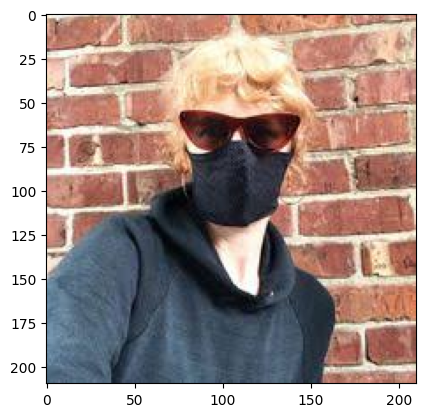

In [ ]:
# DISPLAYING with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_2767.jpg') #read as numpy -- you can try for different images this is just example
imgplot = plt.imshow(img) #displaying numpy as a plot
plt.show() #shows the image we are reading then displaying

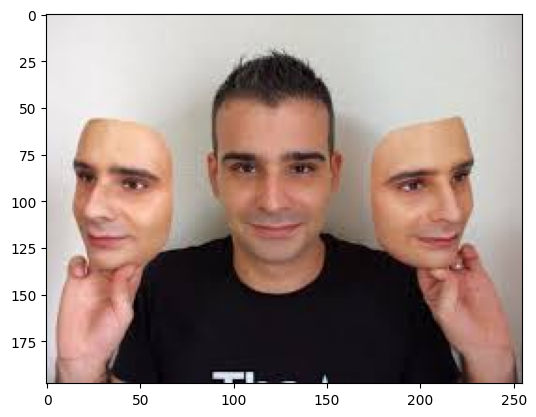

In [ ]:
# DISPLAYING without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2271.jpg') #read as numpy -- you can try for different images this is just example
imgplot = plt.imshow(img) #displaying numpy as a plot
plt.show() #shows the image we are reading then displaying

IMAGE PROCESSING

1. Resize the Images
2. Convert Images to Numpy Array

In [ ]:
# Convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/' #need a forward slash so it doesnt creake a link

data = []

for img_file in with_mask_files: # this for loop goes through all the images in the with_mask_files to

  image = Image.open(with_mask_path + img_file) #reading all the images using the path + img_file
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)





without_mask_path = '/content/data/without_mask/' #need a forward slash so it doesnt creake a link

for img_file in without_mask_files: # this for loop goes through all the images in the with_mask_files to

  image = Image.open(without_mask_path + img_file) #reading all the images using the path + img_file
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
len(data) # number of individual numpy arrays of individual images

7553

In [ ]:
data[0] #pixel values

array([[[195, 144,  91],
        [197, 143,  92],
        [197, 143,  91],
        ...,
        [169, 158, 159],
        [169, 158, 159],
        [170, 157, 159]],

       [[195, 144,  91],
        [196, 145,  92],
        [196, 144,  89],
        ...,
        [167, 158, 159],
        [167, 157, 161],
        [167, 156, 159]],

       [[195, 144,  95],
        [198, 143,  93],
        [197, 144,  93],
        ...,
        [167, 159, 159],
        [168, 156, 160],
        [166, 157, 160]],

       ...,

       [[207, 158, 107],
        [221, 171, 119],
        [232, 181, 121],
        ...,
        [ 46,  47,  59],
        [ 46,  46,  57],
        [ 45,  46,  55]],

       [[205, 157, 106],
        [220, 171, 118],
        [232, 181, 122],
        ...,
        [ 44,  46,  59],
        [ 43,  46,  55],
        [ 45,  46,  55]],

       [[201, 155, 106],
        [218, 168, 114],
        [232, 178, 124],
        ...,
        [ 43,  45,  56],
        [ 44,  46,  55],
        [ 43,  46,  55]]

In [ ]:
type(data[0]) #first image in the list

numpy.ndarray

In [ ]:
data[0].shape #height, width, and color chanel

(128, 128, 3)

In [ ]:
# Converting image list and label list to numpy array

X = np.array(data) #IMAGE ARRAY
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape) #7553 total inidividual arrays (images), 128 height in array, 128 width of array, and color channel is 3
print(Y.shape) #labels which are o and 1 which indicate mask and no masl


(7553, 128, 128, 3)
(7553,)


Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2) # testing 20% of data

In [ ]:
print(X.shape, X_train.shape, X_test.shape) # this contains original array + 80% of original data in training + 20% of data in testing

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
X_train[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 254],
        [254, 254, 253],
        [253, 252, 252],
        ...,
        [ 98, 111, 128],
        [101, 110, 130],
        [101, 109, 129]],

       [[255, 254, 255],
        [255, 254, 255],
        [254, 254, 254],
        ...,
        [ 95, 107, 123],
        [100, 110, 129],
        [101, 109, 129]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 92, 106, 119],
        [ 97, 110, 127],
        [ 98, 109, 127]]

In [ ]:
X_train_scaled[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[1.        , 1.        , 0.99607843],
        [0.99607843, 0.99607843, 0.99215686],
        [0.99215686, 0

**BUILDING A CONVOLUTION NEURAL NETWORK (CNN)**

In [ ]:
import tensorflow as tf #
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3))) # adding layers to neural network
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))



model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu')) # adding layers to neural network
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation ='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation ='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation ='sigmoid')) # num of classes is two bc theres two classes and sigmoid is for predicting 2 classes

In [ ]:
# Compile Neural network before training -- set optimization

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5) #validating data to see how the model is performing


Epoch 1/5
170/170 [==============================] - 147s 854ms/step - loss: 0.5215 - acc: 0.7637 - val_loss: 0.2985 - val_acc: 0.8926
Epoch 2/5
170/170 [==============================] - 151s 891ms/step - loss: 0.3063 - acc: 0.8790 - val_loss: 0.2599 - val_acc: 0.8926
Epoch 3/5
170/170 [==============================] - 153s 896ms/step - loss: 0.2605 - acc: 0.8955 - val_loss: 0.1982 - val_acc: 0.9306
Epoch 4/5
170/170 [==============================] - 158s 931ms/step - loss: 0.2140 - acc: 0.9093 - val_loss: 0.2006 - val_acc: 0.9207
Epoch 5/5
170/170 [==============================] - 147s 868ms/step - loss: 0.1958 - acc: 0.9239 - val_loss: 0.1879 - val_acc: 0.9240


**MODEL EVALUATION**

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)

print('Test Accuracy =', accuracy)

48/48 [==============================] - 11s 223ms/step - loss: 0.2090 - acc: 0.9193
Test Accuracy = 0.9192587733268738


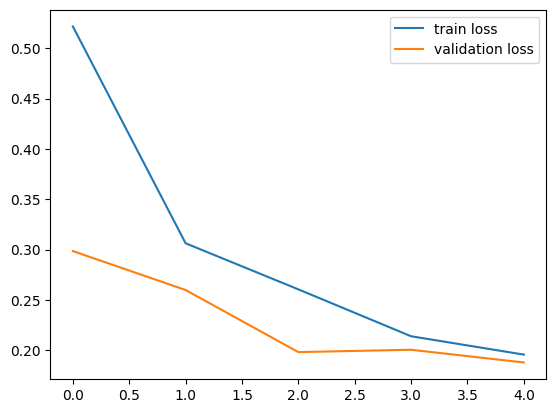

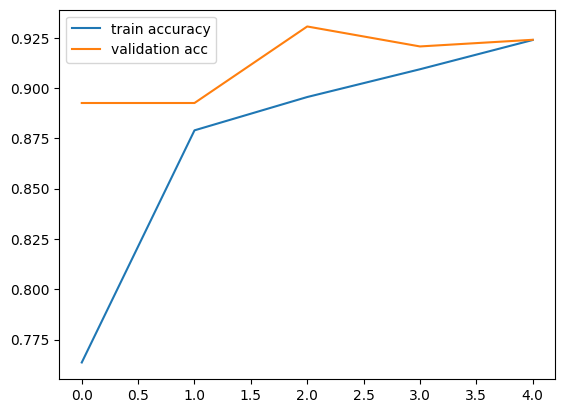

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation acc')
plt.legend()
plt.show()

#loss is distance between true and predicted

PREDICTIVE SYSTEM


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resize/255

input_image_reshaped = np.reshape(input_image_scaled [1, 128, 128, 3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is weaing a mask')
else:
  print('The person in the image is not weaing a mask')